In [2]:
%pylab inline
import skimage.morphology
from scipy.signal import filtfilt
from scipy.ndimage.filters import gaussian_filter
import cv2

Populating the interactive namespace from numpy and matplotlib


# Exercise 7

In this exercise, we want to apply morphological filters and normalize images.

## Morphological operations

### Erosion and Dilation

Load the image 'square_circle.png'.

In [3]:
img = cv2.imread('square_circle.png')

Create a circle and a square structuring element with a kernel size of (15,15). Use cv2.getStructuringElement().

In [4]:
circle = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
square = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))

Apply the circular structuring element to the image by using cv2.morphologyEx(). Try erosion and dilation. Create a plot with the output images.

In [5]:
img_eroded_circle = cv2.morphologyEx(img, cv2.MORPH_ERODE, circle)
img_dilated_circle = cv2.morphologyEx(img, cv2.MORPH_DILATE, circle)

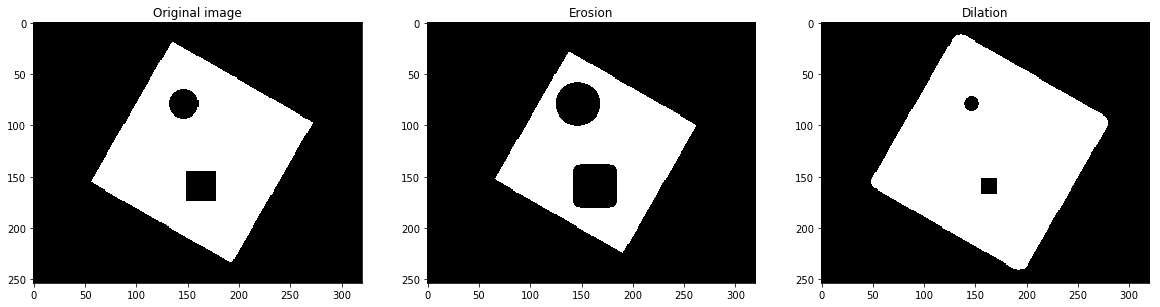

In [6]:
figure(figsize(20,5))
plt.subplot(1,3,1), plt.imshow(img), plt.title("Original image")
plt.subplot(1,3,2), plt.imshow(img_eroded_circle), plt.title("Erosion")
plt.subplot(1,3,3), plt.imshow(img_dilated_circle), plt.title("Dilation");

Apply the square structuring element to the image. Try erodation and dilation.

In [7]:
img_eroded_square = cv2.morphologyEx(img, cv2.MORPH_ERODE, square)
img_dilated_square = cv2.morphologyEx(img, cv2.MORPH_DILATE, square)

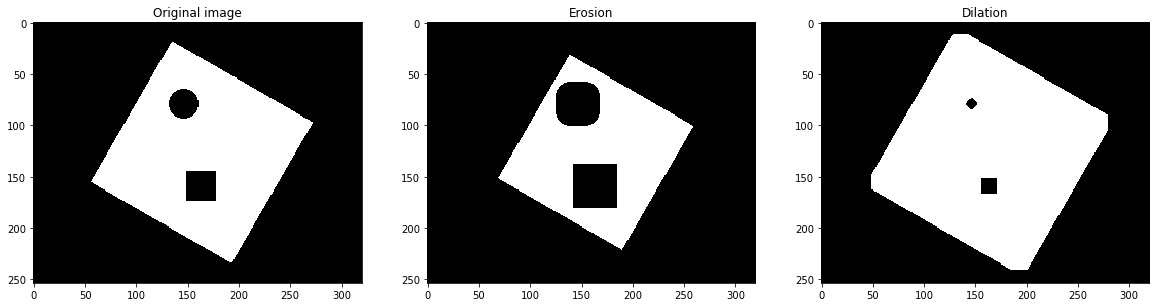

In [8]:
figure(figsize(20,5))
plt.subplot(1,3,1), plt.imshow(img), plt.title("Original image")
plt.subplot(1,3,2), plt.imshow(img_eroded_square), plt.title("Erosion")
plt.subplot(1,3,3), plt.imshow(img_dilated_square), plt.title("Dilation");

### Opening and Closing

Opening ang closing are a combination of erosion and dilation.

Opening = Erosion + Dilation


Closing = Dilation + Erosion


#### Example 1: Vertical and Diagonal Lines - Keeping Horizontal Lines

Load 'lines.png'and create a Rectangular structuring element with a kernel size of (11,5).
Apply opening with this element on the image and have a look on it by plotting the original and the resulting image.

In [17]:
img = cv2.imread('lines.png')
strel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,11)) # width: 11, height: 5
print(strel)
opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, strel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


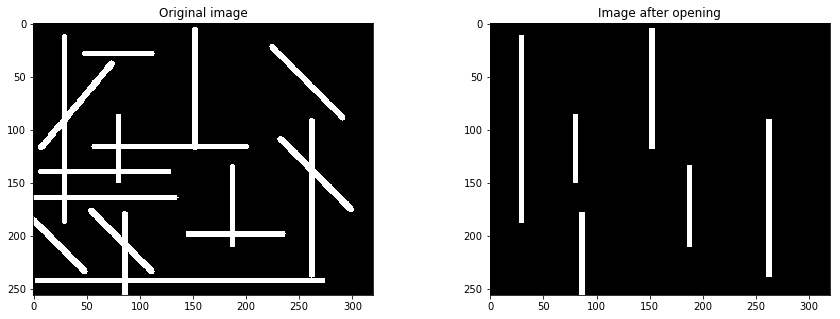

In [18]:
figure(figsize(15,5))
plt.subplot(1,2,1), plt.imshow(img), plt.title("Original image")
plt.subplot(1,2,2), plt.imshow(opened), plt.title("Image after opening");

#### Example 2: Removing lines, keeping circles

Load 'circles_lines.png', create a circular structuring element with kernelsize (15,15) and apply opening with it.

In [16]:
img = cv2.imread('circles_lines.png')
strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, strel)

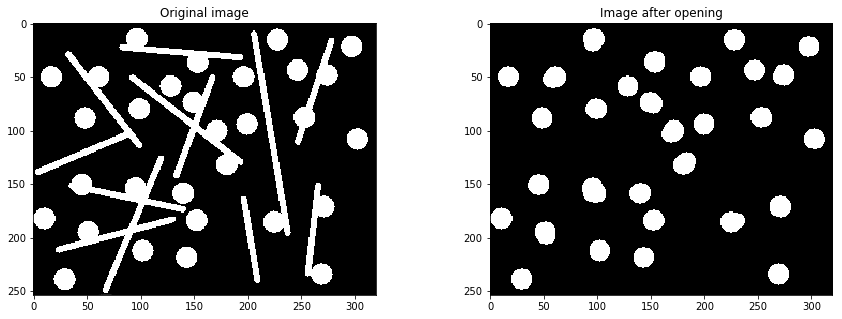

In [17]:
figure(figsize(15,5))
plt.subplot(1,2,1), plt.imshow(img), plt.title("Original image")
plt.subplot(1,2,2), plt.imshow(opened), plt.title("Image after opening");

#### Example 3: Removing only small disks

In [18]:
img = cv2.imread('disk.png')
strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (21, 21))
closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, strel)

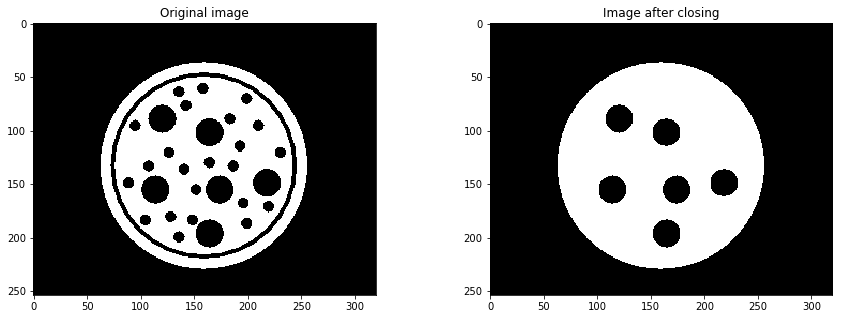

In [19]:
figure(figsize(15,5))
plt.subplot(1,2,1), plt.imshow(img), plt.title("Original image")
plt.subplot(1,2,2), plt.imshow(closed), plt.title("Image after closing");

### Example: Combination of Opening and Closing for Binarization Enhancement of Writings

Load 'combination.png', create a circular structuring element with a kernel size of (6,6) and apply first closing, than opening with it on the image. Create a plot including the original, the result after closing and the final result.

In [20]:
img = cv2.imread('combination.png')
strel= cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6, 6))
closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, strel)
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, strel)

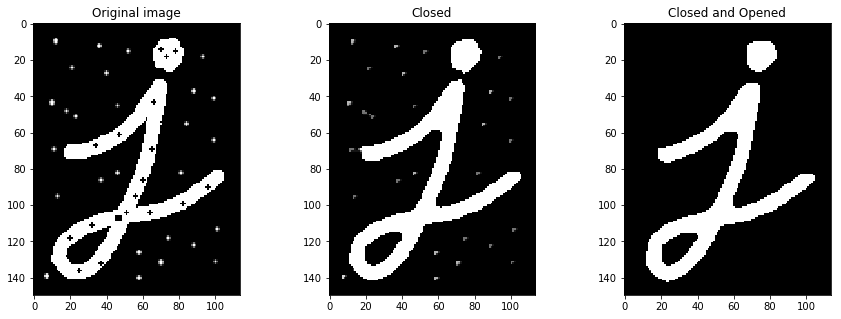

In [21]:
figure(figsize(15,5))
plt.subplot(1,3,1), plt.imshow(img), plt.title("Original image")
plt.subplot(1,3,2), plt.imshow(closed), plt.title("Closed");
plt.subplot(1,3,3), plt.imshow(opened), plt.title("Closed and Opened");

Create a circular element with a kernelsize of (7,7). Erode the original image. Also dilate the original image and plot the outputs.

In [22]:
strel= cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
eroded = cv2.morphologyEx(opened, cv2.MORPH_ERODE, strel)
dilated = cv2.morphologyEx(opened, cv2.MORPH_DILATE, strel)

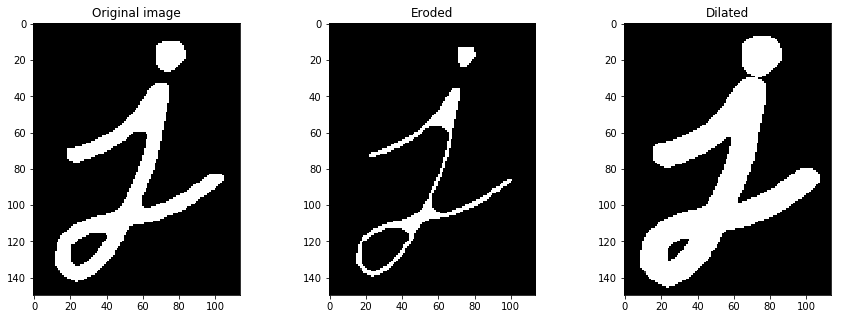

In [23]:
figure(figsize(15,5))
plt.subplot(1,3,1), plt.imshow(opened), plt.title("Original image")
plt.subplot(1,3,2), plt.imshow(eroded), plt.title("Eroded");
plt.subplot(1,3,3), plt.imshow(dilated), plt.title("Dilated");

Let's try it on a more realistic example. Load ' handwritten.jpg as grayscale image and add salt and pepper noise (skimage.util.random_noise(img, mode='s&p', amount=0.05).

In [24]:
img = cv2.imread('handwritten.jpg',0)
img_salt_pepper = skimage.util.random_noise(img, mode='s&p', amount=0.05)

Create a circular structuring element with a kernelseize of (2,2). Close and open the image.

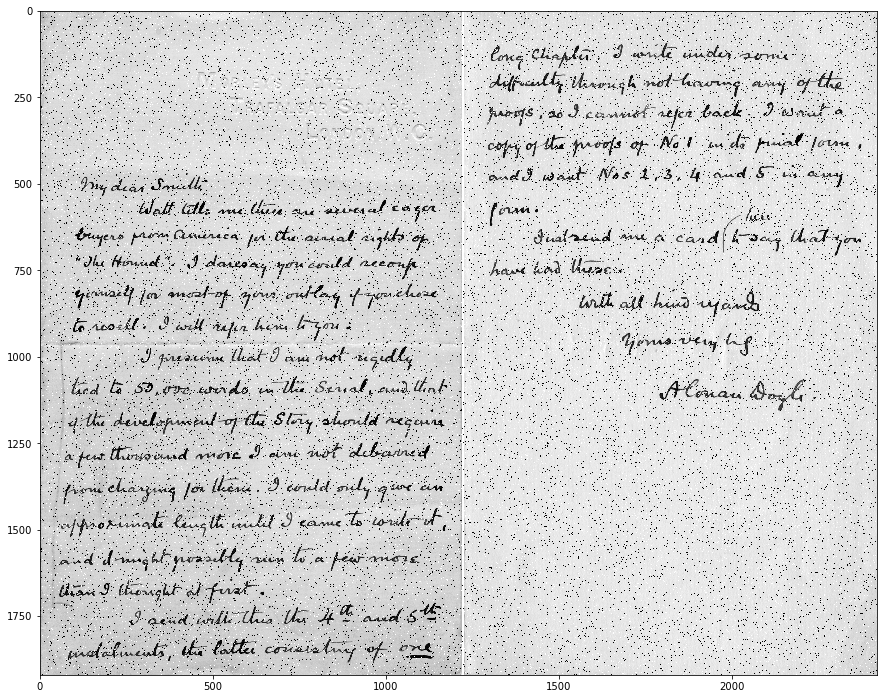

In [26]:
strel= cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closed = cv2.morphologyEx(img_salt_pepper, cv2.MORPH_CLOSE, strel)
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, strel)

figure(figsize(15,15))
plt.imshow(img_salt_pepper,cmap='gray')

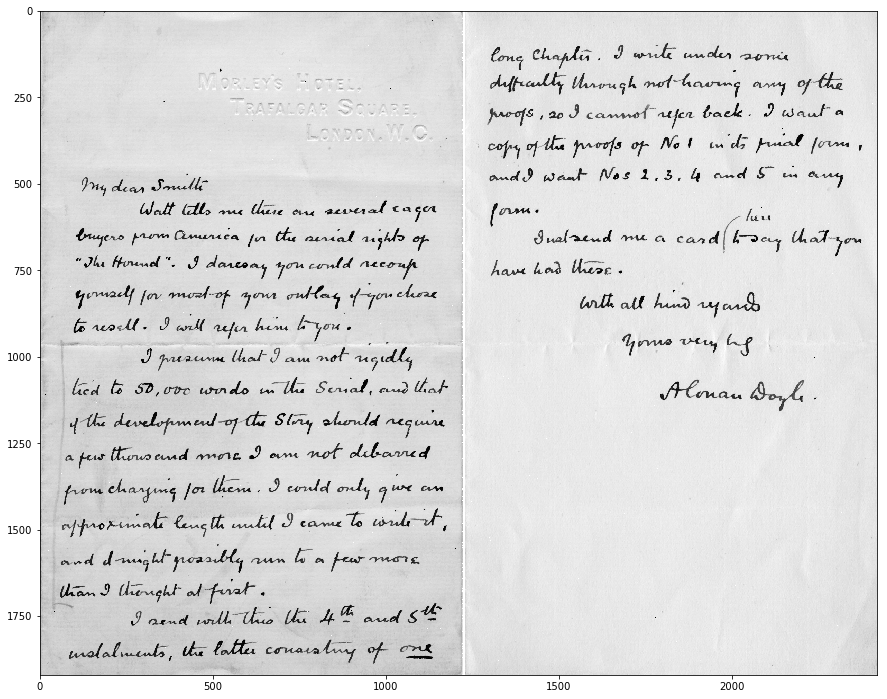

In [30]:
plt.imshow(opened,cmap='gray')